# Exercise 7 | Principle Component Analysis and K-Means Clustering

## Part 1: Load Example Dataset

In [2]:
load ('ex7data1.mat');

In [3]:
whos

Variables visible from the current scope:

variables in scope: top scope

   Attr Name        Size                     Bytes  Class
   ==== ====        ====                     =====  ===== 
        X          50x2                        800  double
        ans         1x5                          5  char

Total is 105 elements using 805 bytes



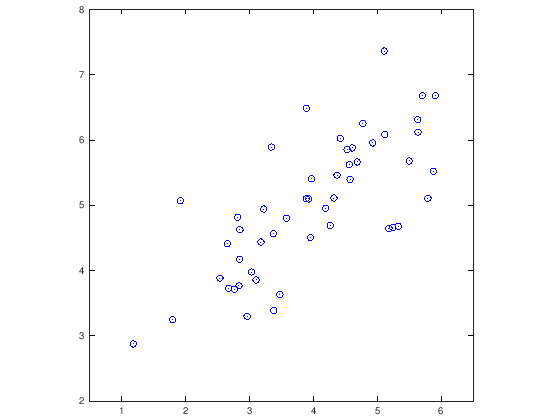

In [7]:
graphics_toolkit ('gnuplot');
plot(X(:, 1), X(:, 2), 'bo');
axis([0.5 6.5 2 8]); axis square;

## Part 2: Principal Component Analysis

In [8]:
%  Before running PCA, it is important to first normalize X
[X_norm, mu, sigma] = featureNormalize(X);

In [9]:
[m, n] = size(X_norm); 

In [10]:
fprintf('%d %d', m, n);

50 2

In [11]:
Sigma = (1/m) * (X_norm' * X_norm);
fprintf('%d %d', size(Sigma));

2 2

In [22]:
[U, S, V] = svd(Sigma);

In [18]:
U

U =

  -0.7071  -0.7071
  -0.7071   0.7071



In [13]:
[U, S] = pca(X_norm);

Top eigenvector: 
 U(:,1) = -0.707107 -0.707107 


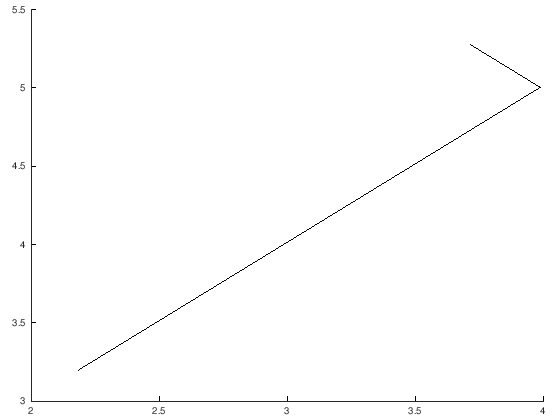

In [17]:
%  Draw the eigenvectors centered at mean of data. These lines show the
%  directions of maximum variations in the dataset.
hold on;
drawLine(mu, mu + 1.5 * S(1,1) * U(:,1)', '-k', 'LineWidth', 2);
drawLine(mu, mu + 1.5 * S(2,2) * U(:,2)', '-k', 'LineWidth', 2);
hold off;

In [18]:
fprintf('Top eigenvector: \n');
fprintf(' U(:,1) = %f %f \n', U(1,1), U(2,1));

Top eigenvector: 
 U(:,1) = -0.707107 -0.707107 


## Part 3: Dimension Reduction

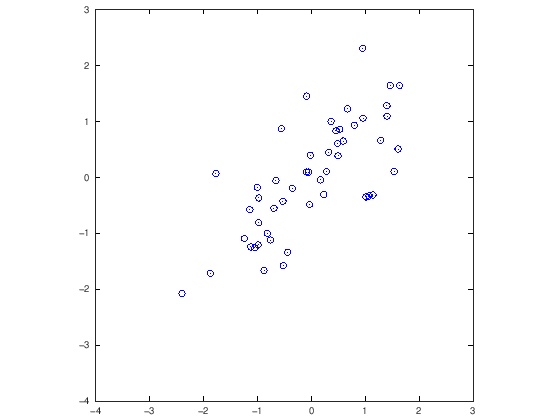

In [15]:
%  Plot the normalized dataset (returned from pca)
plot(X_norm(:, 1), X_norm(:, 2), 'bo');
axis([-4 3 -4 3]); axis square

In [19]:
%  Project the data onto K = 1 dimension
K = 1;

In [23]:
fprintf('size(U) %d %d, size(X_norm) %d %d', size(U), size(X_norm));

size(U) 2 2, size(X_norm) 50 2

In [34]:
Z = (U(:, 1:K)' *  X_norm')';
fprintf('size(Z) %d %d, Z(1) %f', size(Z), Z(1));

size(Z) 50 1, Z(1) 1.481274

In [33]:
Z = (X_norm * U(:, 1:K));
fprintf('size(Z) %d %d, Z(1) %f', size(Z), Z(1));

size(Z) 50 1, Z(1) 1.481274

In [32]:
Z = projectData(X_norm, U, K);
fprintf('size(Z) %d %d, Z(1) %f', size(Z), Z(1));

size(Z) 50 1, Z(1) 1.481274

In [36]:
X_rec = Z * U(:, 1:K)';
fprintf('size(X_rec) %d %d, X_rec(1) %f %f', size(X_rec), X_rec(1, :));

size(X_rec) 50 2, X_rec(1) -1.047419 -1.047419

In [37]:
X_rec  = recoverData(Z, U, K);
fprintf('size(X_rec) %d %d, X_rec(1) %f %f', size(X_rec), X_rec(1, :));

size(X_rec) 50 2, X_rec(1) -1.047419 -1.047419